# Importing necessary files

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
%matplotlib inline

# Collecting URL of 100 pages of IMDB to Scrape in a list

In [5]:
front='https://www.imdb.com/search/title/?release_date=2000,2009&title_type=feature&sort=moviemeter,asc&view=simple&page='
tail='&ref_=adv_nxt'
mid=1
url=[]
for i in range(1,101,1):
    temp_url= front+ str(i)+ tail
    url.append(temp_url)
    
    

In [16]:
len(url)

100

In [18]:
#to check last index in url list
url[-1]

'https://www.imdb.com/search/title/?release_date=2000,2009&title_type=feature&sort=moviemeter,asc&view=simple&page=100&ref_=adv_nxt'

In [287]:
#importing BeautifulSoup!
from bs4 import BeautifulSoup

In [34]:
list_div=[]
for item in url:
    r=requests.get(item)
    soup=BeautifulSoup(r.text,'html.parser')
    results=soup.find_all('div',attrs={'lister-item-content'})
    for x in results:
        list_div.append(x)

# Now checking ways to access the HTML tree to grab the required data : Movie name, Year, IMDB ratings, Number of votes!

In [35]:
len(list_div)

5000

In [ ]:
list_div[-1].find('span',attr='lister-item-index unbold text-primary')

In [42]:
list_div[-1].find('span',attrs={'lister-item-index unbold text-primary'}).text[:-1]

'5,000'

In [44]:
list_div[-1].find('a').text

'Dek hor'

In [169]:
import re

In [178]:
def get_year(name):
    return re.search('\s\((\d{4})\)$',name)

In [209]:
raw=list_div[-1].find('span',attrs={"lister-item-year text-muted unbold"}).text

if(re.search('\d{4}',raw)):
    print("true")
re.findall('\d{4}',raw)[0]

true


'2006'

In [289]:
line=list_div[-1].find('strong')['title']
line
line_split=line.split()
rating=line_split[0]
votes=line_split[3]
votes

'1,627'

# Extracting useful information from the website!

In [216]:
movie=[]
year=[]
IMDB_rating=[]
votes=[]
for item in list_div:
    #name of the movie
    movie.append(item.find('a').text)
    
    #year of the movie
    tem=item.find('span',attrs={"lister-item-year text-muted unbold"}).text
    #using regular expression to find out year in which movie was released!
    tem1= re.findall('\d{4}',tem)[0]
    year.append(tem1)
    
    #IMDB rating of the movie
    line=item.find('strong')['title']
    line_split=line.split()
    rating=float(line_split[0])
    IMDB_rating.append(rating)
    
    #Number of Votes 
    #We have to remove ',' (comma) in order to convert this number into float
    temp=line_split[3]
    temp1=temp.split(',')
    temp2=''
    for x in temp1:
        temp2=temp2+x
    
    votes.append(temp2)
    
    

In [217]:
num_votes=[]
for i in votes:
    try:
        num_votes.append(float(i))
    except ValueError:
        num_votes.append(0)
        pass
#there are some strings in the dataset which are 'votes' because they didn't have any voters

# Creating dictionary for the DataFrame!

In [218]:
dictionary={
    'Name':movie,
    'Year':year,
    'Rating':IMDB_rating,
    'Votes':num_votes
}

# Creating DataFrame!

In [219]:

df=pd.DataFrame(dictionary)

# Exploring DataFrame!

In [220]:
df.head()

,Name,Year,Rating,Votes
0,Mean Girls,2004,7.0,288964.0
1,Harry Potter and the Sorcerer's Stone,2001,7.6,538933.0
2,Spider-Man 3,2007,6.2,442494.0
3,The Dark Knight,2008,9.0,1972745.0
4,Harry Potter and the Goblet of Fire,2005,7.7,461929.0


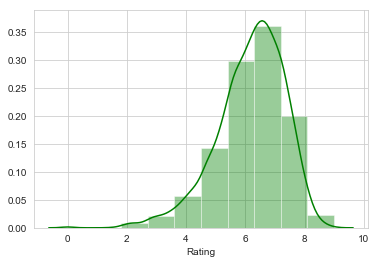

In [246]:
#Average rating received !
'''
    ---> It is seen that a movie is most likely to get a rating of 7
'''
sns.set_style('whitegrid')
sns.distplot(df['Rating'],bins=10,color='green')

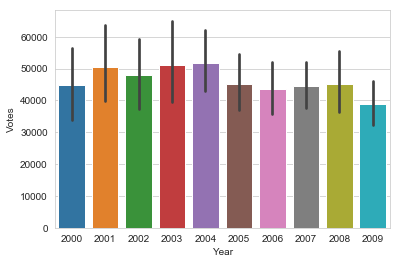

In [245]:
#Average number of voters per Year
'''
     ---> Clearly, Average number of voters were least in year 2009!
'''

sns.barplot(y='Votes',x='Year',data=df)


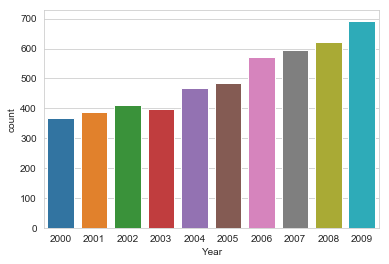

In [248]:
#Number of movies each year
'''
   ---> It can be inferred that number of movies has increased each year except 2003 where we observed a dip in the number 
        of movies!
'''
sns.countplot(x='Year',data=df)

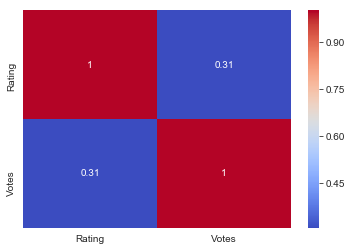

In [255]:
#Checking if there is any correlation between data!
'''
   ---> This means there is no strong co-relation between Ratings and number of votes! which further can be explained by:
        If number of votes increases then it's not necessary that rating of that movie would increase or vice-versa.
'''
tc=df.corr()
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [285]:
#Movie which got maximum Rating!
df[df['Rating']==df['Rating'].max()]

,Name,Year,Rating,Votes
3,The Dark Knight,2008,9.0,1972745.0


In [286]:
#Movie which wasn't rated by any voters
df[df['Votes']==0]

,Name,Year,Rating,Votes
4130,Ekai Eksho,2006,0.0,0.0
4443,Pehli Suhagraat,2001,0.0,0.0
4624,Vatsyayana Kamasutra,2001,0.0,0.0
4757,Denise Austin: Mat Workout Based on the Workou...,2001,0.0,0.0


# Finally exporting the scraped dataset to CSV file!

In [290]:
#Finally storing Dataset by exporting that to CSV file!
df.to_csv('IMDB.csv')